Let's read the dataset.

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/MLDM /Course Work-1/Dataset.csv')
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


These are the columns present in the given dataseat

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


Using describe function, examine the basic statistical details:

In [4]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


Now, let's see the dataset if there are any null values or NaN:

In [5]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [6]:
df[df.region.isnull()==True]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
188,Steve Mounie,Huddersfield,22,CF,1,5.5,56,6.0,0.60%,0,NaN,Benin,0,2,8,0,0


As you can see above, NaN value is there in region column. So, now filling it with true value.

In [7]:
df.region.fillna(value=2,inplace=True)

In [8]:
df['fpl_sel'] = df['fpl_sel'].astype('string')
for i in range(0,len(df['fpl_sel'])):
  df['fpl_sel'][i] = df['fpl_sel'][i].strip("%")
df['fpl_sel'] = df['fpl_sel'].astype('float')
print(df.dtypes)

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel         float64
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object


Question-1:
Ploting graph using seaborn

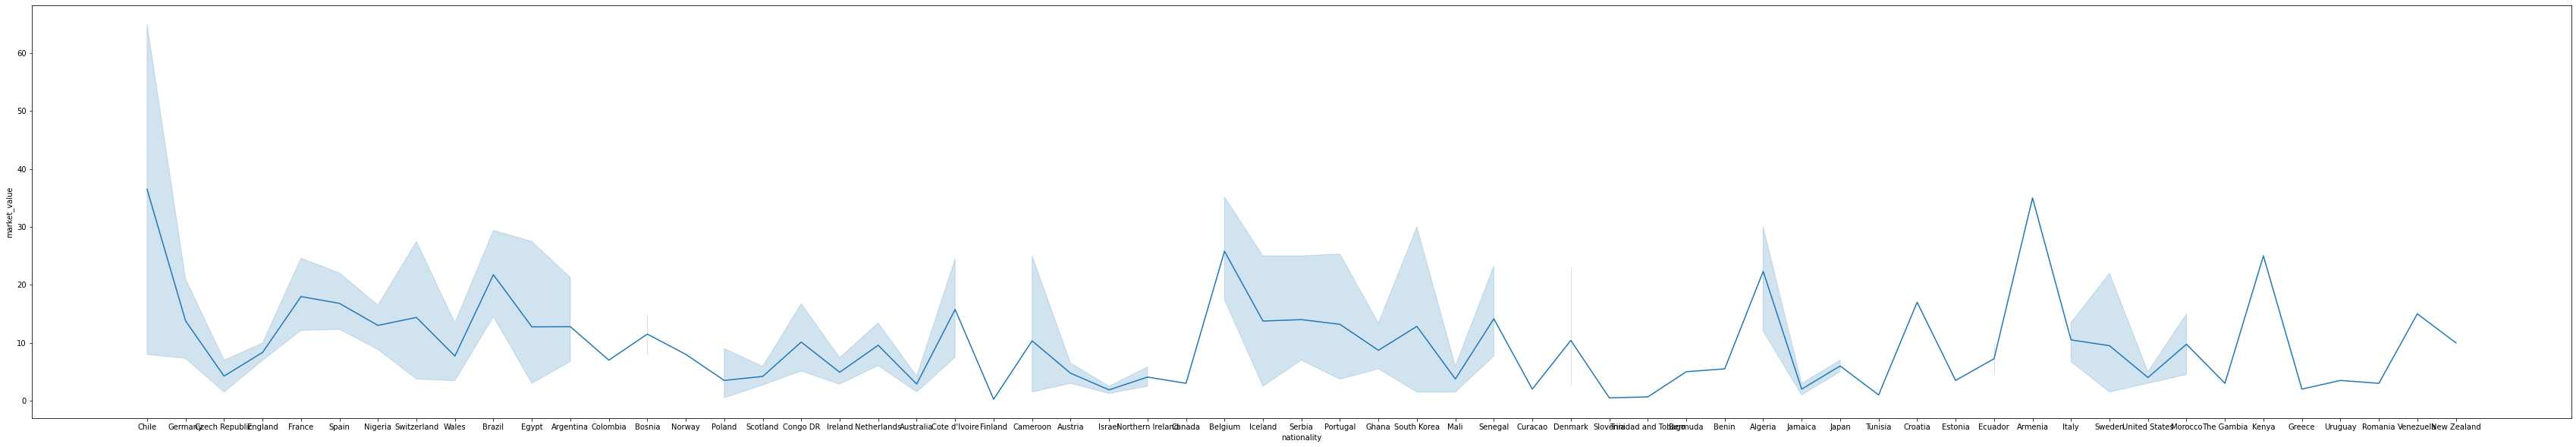

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (60 , 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df,x='nationality',y='market_value',ax=ax)

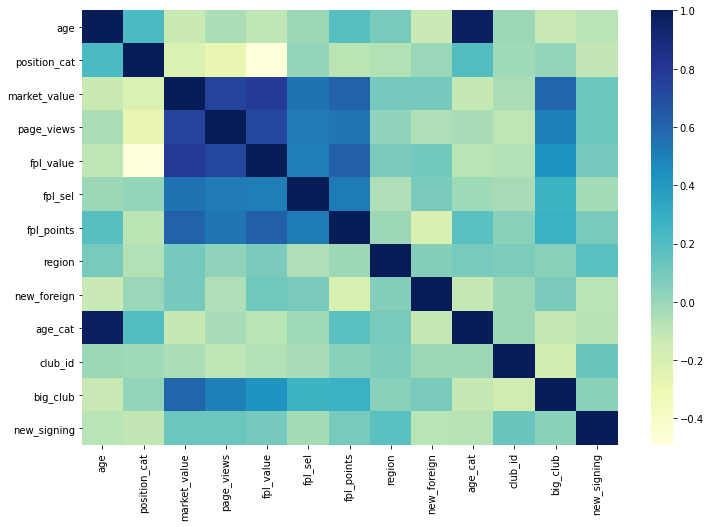

In [10]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="YlGnBu")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.

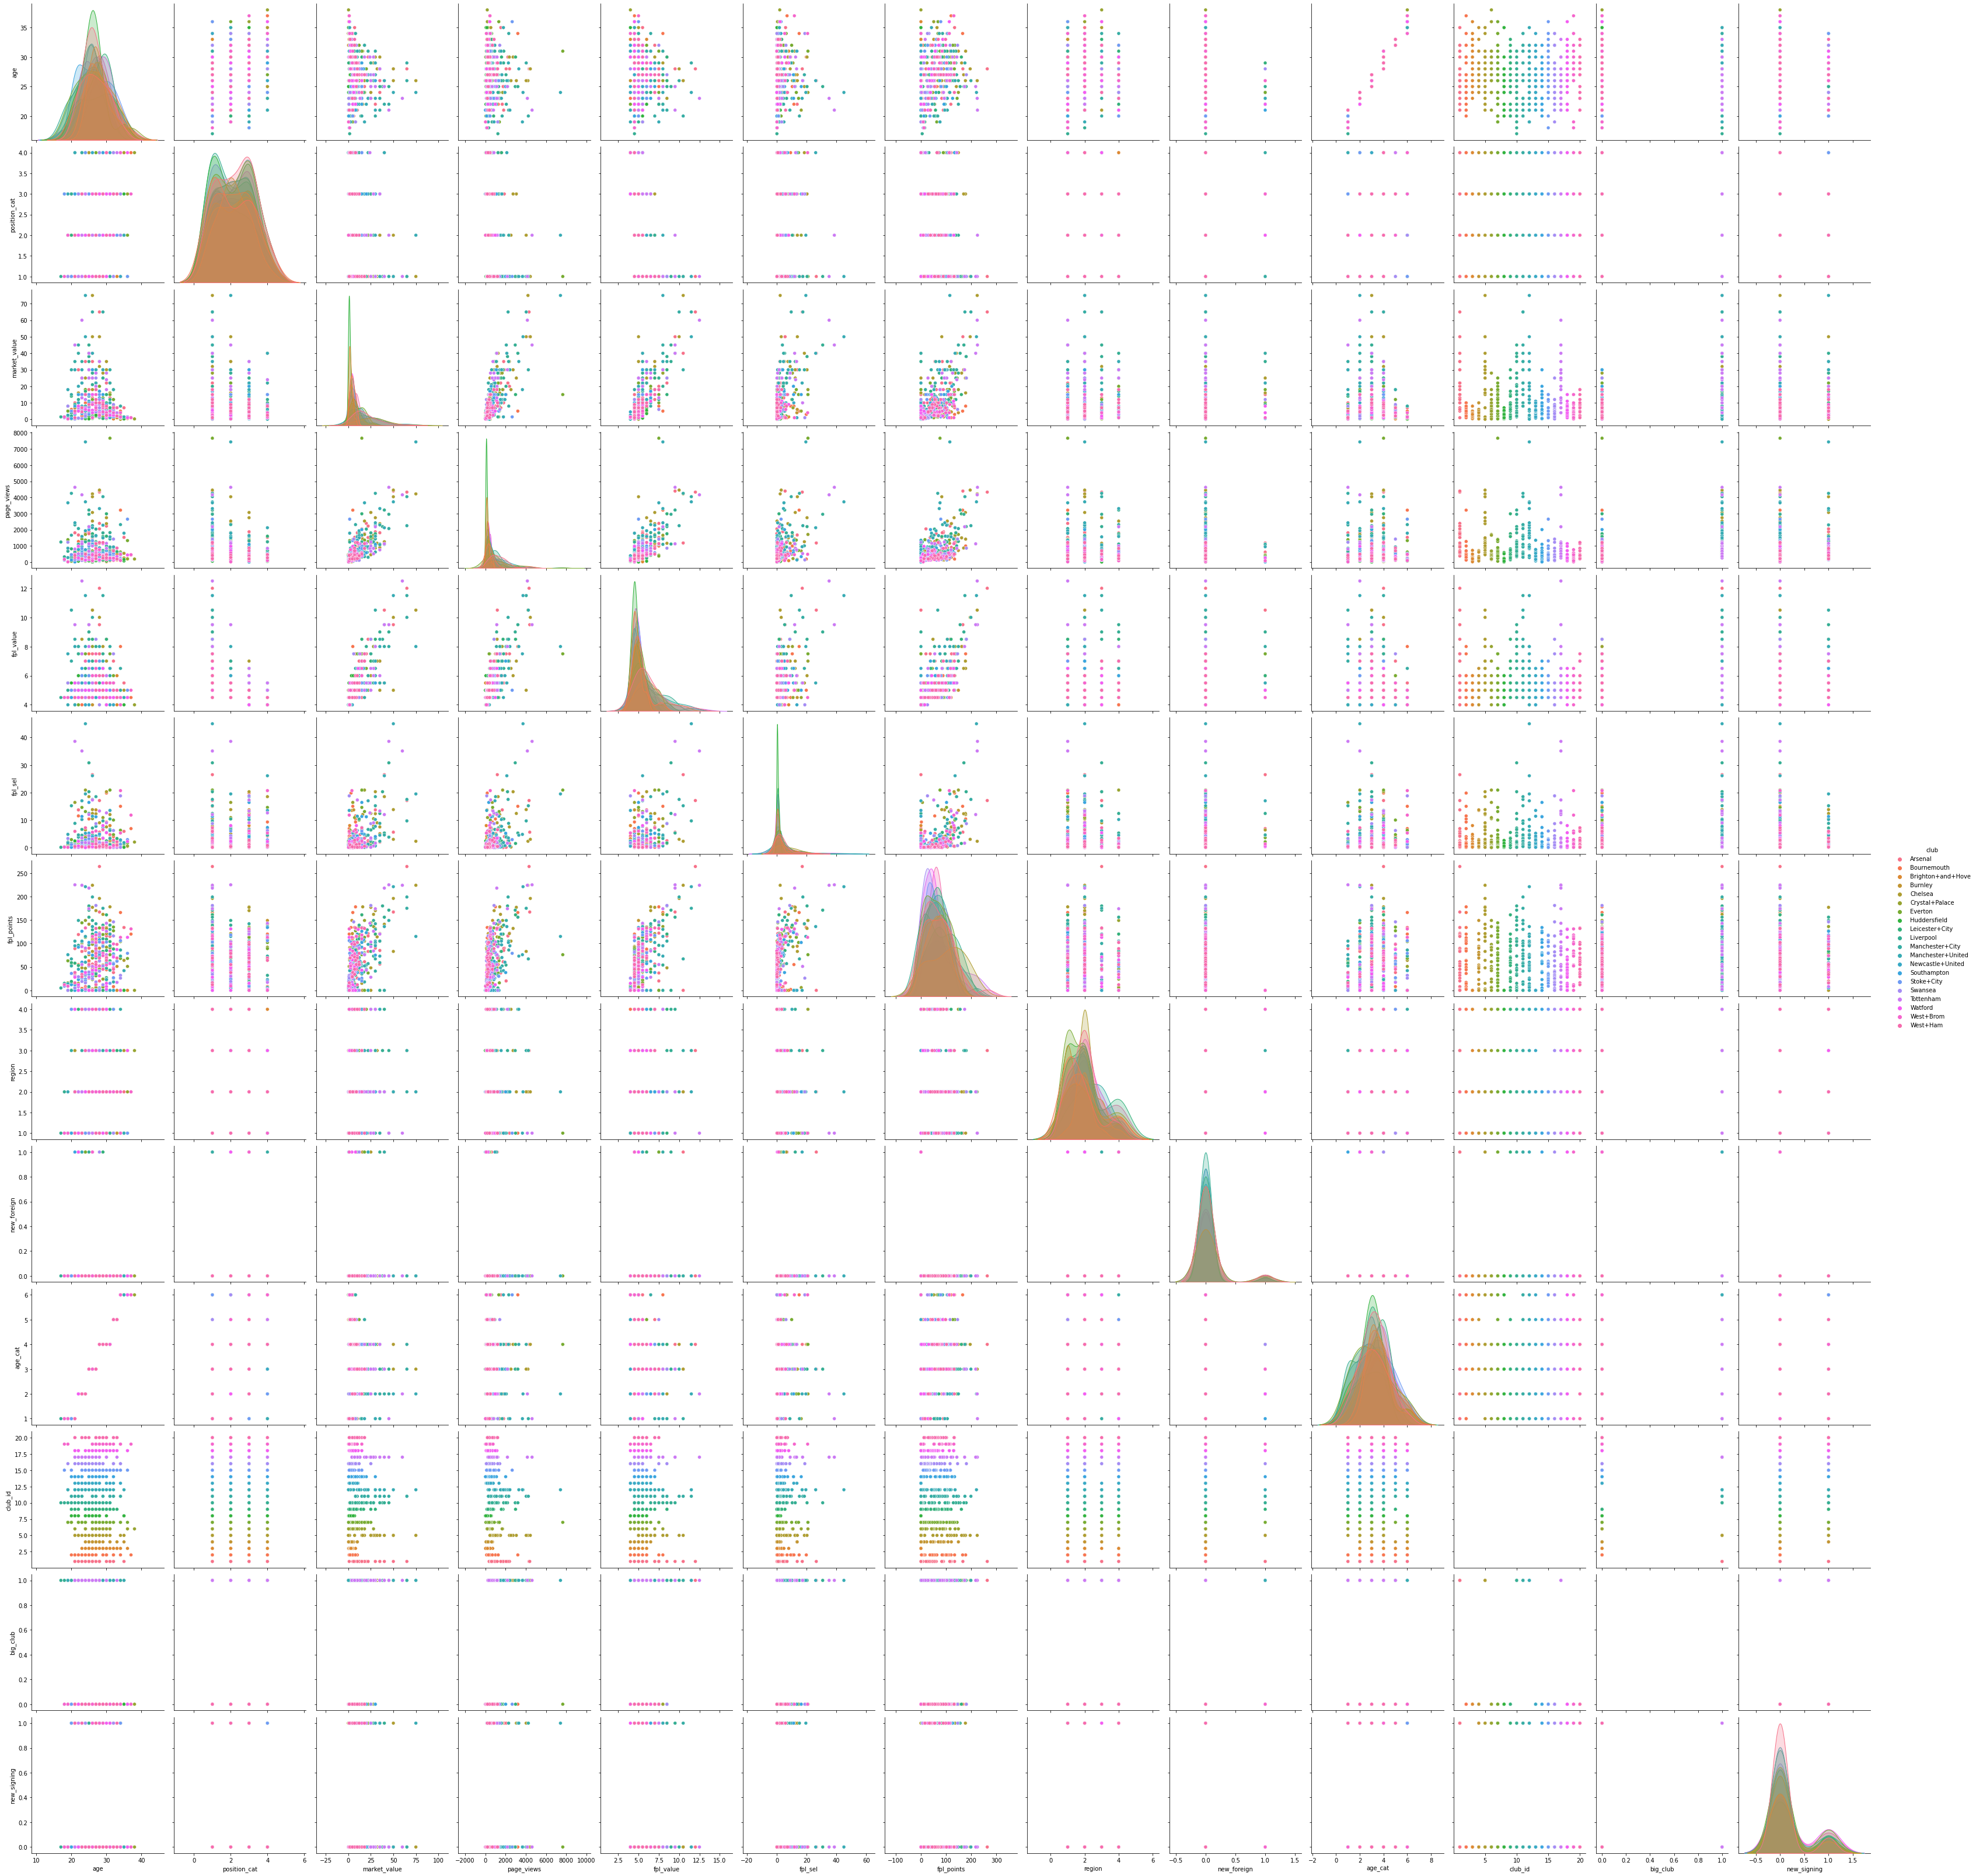

In [11]:
sns.pairplot(df, hue='club', size=3.5);

Let's see whether there is any correlation between this market value and other variables. We'll do this using a pairgrid, which draws plots of all these correlations:

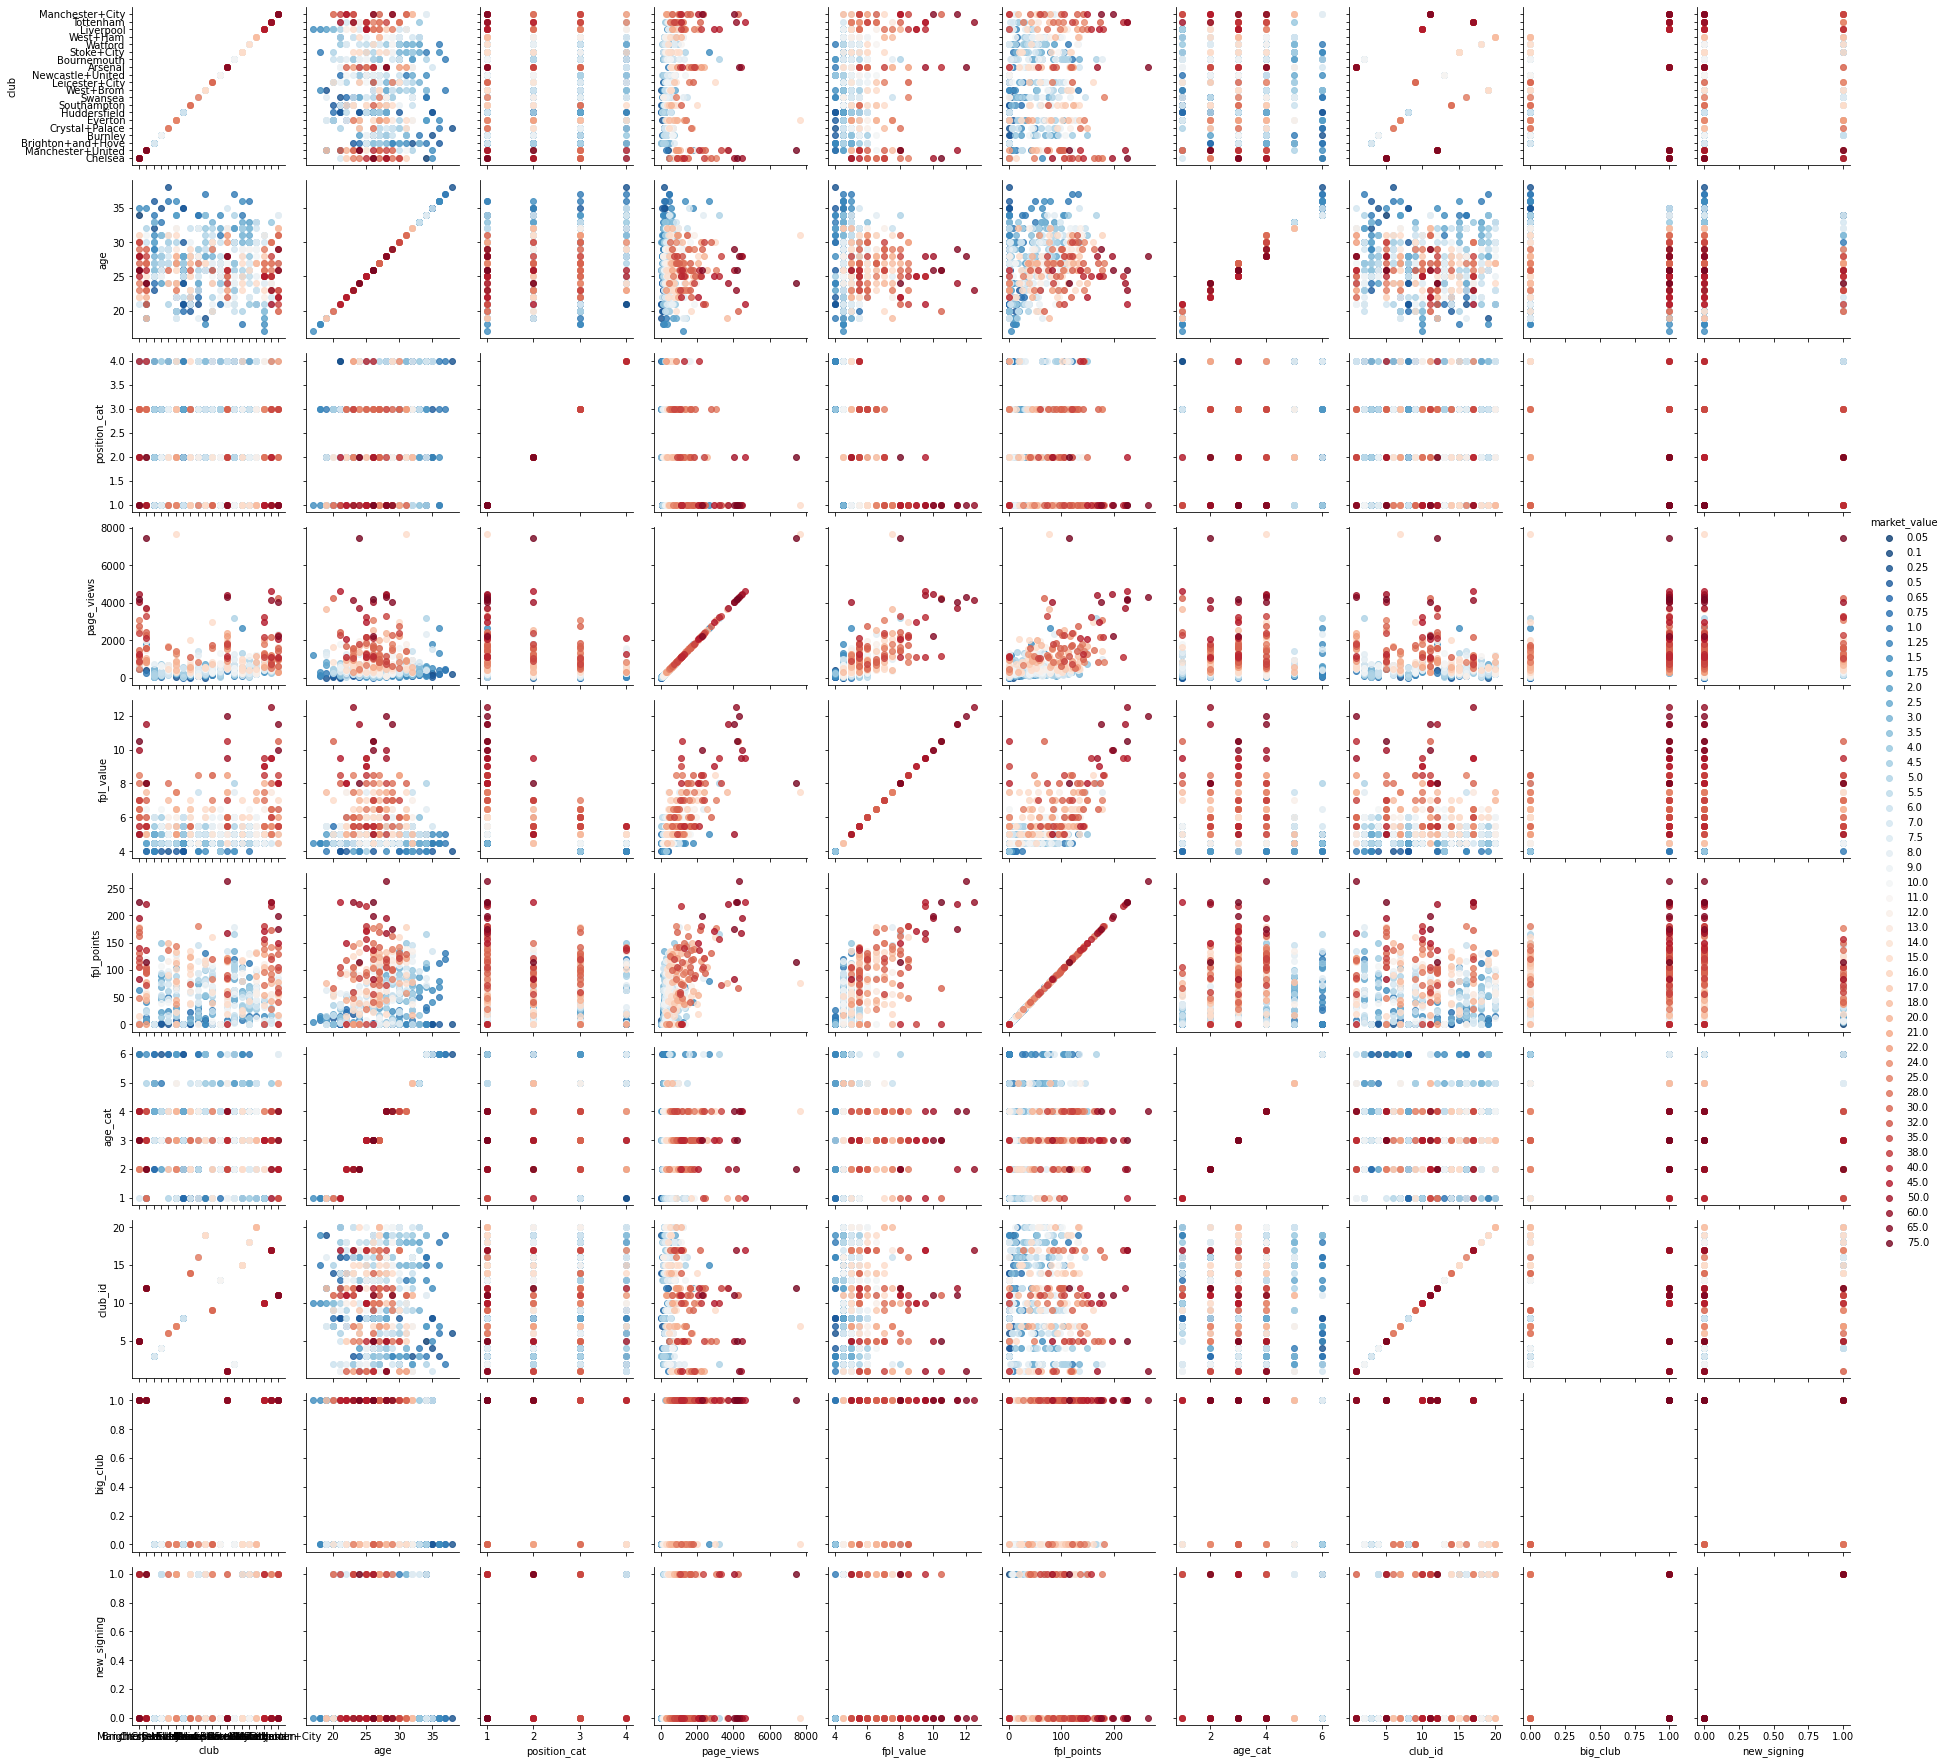

In [12]:
g = sns.PairGrid(df, vars=['club','age','position_cat','page_views','fpl_value','fpl_points','age_cat','club_id','big_club','new_signing'], hue='market_value', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Question-2:

In [13]:
df.corr()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,-0.003018,0.187785,0.086273,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,0.017437,-0.084682,-0.062397,0.001415,0.196853,-0.016599,0.017915,-0.105127
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.548703,0.615155,0.101629,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.524926,0.542464,0.031024,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.504888,0.618837,0.082420,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_sel,-0.003018,0.017437,0.548703,0.524926,0.504888,1.000000,0.517008,-0.053238,0.079416,-0.010506,-0.033063,0.269498,-0.026993
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,0.517008,1.000000,-0.006720,-0.204837,0.176572,0.041094,0.280061,0.085720
region,0.086273,-0.062397,0.101629,0.031024,0.082420,-0.053238,-0.006720,1.000000,0.050898,0.089879,0.068652,0.039052,0.176707
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,0.079416,-0.204837,0.050898,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,-0.010506,0.176572,0.089879,-0.113998,1.000000,-0.004668,-0.113835,-0.076102


In [14]:
df.corr()['market_value'].sort_values()

position_cat   -0.217637
age            -0.132396
age_cat        -0.117682
club_id        -0.046068
new_foreign     0.098056
region          0.101629
new_signing     0.131321
fpl_sel         0.548703
big_club        0.593483
fpl_points      0.615155
page_views      0.739657
fpl_value       0.788653
market_value    1.000000
Name: market_value, dtype: float64

From the above corr values, we can see some of the attriburtes were negative. That means they are least dependent on market value. Now, for more accuracy keep all attributes expect the alphabetical columns.

In [15]:
df1=df
df1.drop(["name","club","position","nationality"],axis='columns',inplace=True)
df1

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,17.1,264,3.0,0,4,1,1,0
1,28,1,50.0,4395,9.5,5.6,167,2.0,0,4,1,1,0
2,35,4,7.0,1529,5.5,5.9,134,2.0,0,6,1,1,0
3,28,1,20.0,2393,7.5,1.5,122,1.0,0,4,1,1,0
4,31,3,22.0,912,6.0,0.7,121,2.0,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,21,2,5.0,288,4.5,0.4,38,2.0,0,1,20,0,1
457,23,3,7.0,199,4.5,0.2,34,4.0,0,2,20,0,1
458,23,3,4.5,198,4.5,0.3,29,1.0,0,2,20,0,0
459,21,1,1.0,412,4.5,5.9,16,1.0,0,1,20,0,1


Now, to train a model we need to split the dataset into training and testing values.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x= df1.drop('market_value',axis=1)
y= df1['market_value']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/4, random_state = 0)
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(xTrain)
xTrain = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(xTest)
xTest = pd.DataFrame(x_test_scaled)

Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
yPrediction = linearRegressor.predict(xTest)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,yPrediction)))
print("R2 score:",r2_score(yTest,yPrediction))

RMSE score: 7.73075628863181
R2 score: 0.6072985514258483


Lasso Regression Model

In [18]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(xTrain, yTrain) 
pred_lasso= model_lasso.predict(xTest)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred_lasso)))
print("R2 score:",r2_score(yTest, pred_lasso))

RMSE score: 7.379306971158561
R2 score: 0.6421922917916314


Ridge Regression Model

In [19]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(xTrain, yTrain) 
pred_rr= rr.predict(xTest)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred_rr)))
print("R2 score:",r2_score(yTest, pred_rr))

RMSE score: 7.7124836706787905
R2 score: 0.6091527563587336


Nearest Neighbour Regression Model

In [20]:
from sklearn import neighbors
from math import sqrt
#storing different values of k
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(xTrain, yTrain)
    pred=model.predict(xTest)
    error = sqrt(mean_squared_error(yTest,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.30509944095421
RMSE value for k=  2 is: 7.442358960474275
RMSE value for k=  3 is: 7.405312243605084
RMSE value for k=  4 is: 7.106279285264013
RMSE value for k=  5 is: 6.770282363082213
RMSE value for k=  6 is: 6.711204854112988
RMSE value for k=  7 is: 6.519754869152316
RMSE value for k=  8 is: 6.506575467405169
RMSE value for k=  9 is: 6.465739110710006
RMSE value for k=  10 is: 6.352775527007997
RMSE value for k=  11 is: 6.41994667450636
RMSE value for k=  12 is: 6.456912848976052
RMSE value for k=  13 is: 6.596383665985772
RMSE value for k=  14 is: 6.643011785437139
RMSE value for k=  15 is: 6.7146454846607
RMSE value for k=  16 is: 6.694973680468501
RMSE value for k=  17 is: 6.809154795257087
RMSE value for k=  18 is: 6.7409822761336295
RMSE value for k=  19 is: 6.792490396082785
RMSE value for k=  20 is: 6.752029077209514


Support Vector Regression Model

In [21]:
from sklearn.svm import SVR
SupportVectorReg=SVR()
SupportVectorReg.fit(xTrain,yTrain)
pred=SupportVectorReg.predict(xTest)
print(pred)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred)))
print("R2 score:",r2_score(yTest, pred))

[12.92612451  5.0976059  11.03115515  5.29513147  7.46528071  4.13527604
 13.01834477 17.10979327  9.11370533  4.44974894  2.10366974 15.14873065
  6.79701473  9.66771002 14.59658702 12.71058422  5.29280969 12.56204084
 10.77951201  4.04909273 17.87793755 10.8347509   8.38711356  7.16186114
  9.968708    7.2197217   7.97125757 21.58067622 16.64590246  4.0029128
  8.05284172 15.76251139  3.86434522  4.83804347  6.75307252  7.84235328
 13.71747689  2.37561189  5.92977255  6.303142    3.9909682  17.26260929
  8.64707472 10.28201974 20.93631538 20.0786061   2.33662487 11.61040497
  3.32079575 11.62115989 22.99247187  8.59198112 12.06021587  6.75026961
  2.83557137  6.30962274 10.00591812  3.08238032  8.33806865 11.62128534
  8.66502043  4.37601902 10.45575347  4.13654376 21.61392679 10.03829381
 16.14565955  5.12296115 12.07597301  3.87343603 16.33600167  5.87003757
  3.4113899  15.37856569  2.16032283  7.41598288 11.84204874  1.98088225
 13.63589445  8.25982025  7.11263286  1.07536255  8.

Decision Tree Regression Model

In [22]:
from sklearn.tree import DecisionTreeRegressor 
DecisionTreeReg = DecisionTreeRegressor()
DecisionTreeReg.fit(xTrain,yTrain)
pred=DecisionTreeReg.predict(xTest)
print(pred)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred)))
print("R2 score:",r2_score(yTest, pred))

[25.   10.   25.    2.5  15.    7.   20.   15.   15.    0.5   1.   15.
  5.5   4.   18.   35.   25.   15.   15.    5.   10.   15.   15.    8.
 20.   15.    5.   50.   15.    5.    4.   30.    4.5   6.   13.    5.
 28.    1.    5.    7.    0.25 30.    3.5  15.   25.   30.    0.25 15.
  0.25  9.   28.   13.   15.   15.    3.   15.   10.    2.    9.   11.
  0.75  4.   17.    0.5  28.   22.   22.    5.5  13.   15.   20.    4.
  3.   38.    2.    2.   15.    2.   25.    3.5   5.    0.5  15.   40.
 10.    0.5  18.   18.    5.    8.    3.    5.    7.   30.   15.   40.
 15.    2.    5.    1.5   8.   25.   10.   35.    2.   20.   15.   40.
 10.   12.   32.   50.   15.   13.   15.    5.  ]
RMSE score: 8.62493753100816
R2 score: 0.5112008354385171


Random Forest Regression Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
RandomForestReg = RandomForestRegressor()
RandomForestReg.fit(xTrain,yTrain)
pred=RandomForestReg.predict(xTest)
print(pred)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred)))
print("R2 score:",r2_score(yTest, pred))

[17.465   8.0175 19.83    3.94    9.46   10.79   15.7    20.47   13.345
  0.945   1.035  14.12    6.475   7.2375 14.795  34.405  11.695  15.32
 12.3415  2.1015 21.65   11.735  11.615  13.655  17.06   11.105   2.1225
 58.63   25.11    6.13   10.3    32.405   5.306   6.08    7.892   2.0175
 20.365   2.0075  7.08    6.0675  0.5225 24.64    7.395  12.06   33.97
 36.46    1.4015 11.065   1.725  13.51   30.9    14.595   9.615  10.3025
  4.645   8.47   11.855   1.9165 12.79   11.285   6.176   6.5275 13.8
  1.2015 41.71   19.61   20.97    5.285  11.115   6.505  17.245   4.09
  1.0775 36.42    1.366   2.615   9.406   2.044  25.93    5.855  10.4725
  1.4625  8.1975 30.91    9.39    2.0555 21.83   17.195   3.3375 19.01
  5.42   15.055   5.885  31.6     9.97   22.9085 13.69    0.915   5.3195
  1.819  16.52   21.22    3.4175 23.55    1.8615 20.36   14.39   52.34
 12.67    8.435  26.46   44.53   29.67   17.05   15.03    7.571 ]
RMSE score: 7.202745519998749
R2 score: 0.6591096710426962


Gradient Boosted Regression Model

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(
    n_estimators= 500,
    max_depth= 4,
    min_samples_split= 5,
    learning_rate= 0.01,
)
regressor.fit(xTrain,yTrain)
y_pred = regressor.predict(xTest)
print(pred)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred)))
print("R2 score:",r2_score(yTest,pred))

[17.465   8.0175 19.83    3.94    9.46   10.79   15.7    20.47   13.345
  0.945   1.035  14.12    6.475   7.2375 14.795  34.405  11.695  15.32
 12.3415  2.1015 21.65   11.735  11.615  13.655  17.06   11.105   2.1225
 58.63   25.11    6.13   10.3    32.405   5.306   6.08    7.892   2.0175
 20.365   2.0075  7.08    6.0675  0.5225 24.64    7.395  12.06   33.97
 36.46    1.4015 11.065   1.725  13.51   30.9    14.595   9.615  10.3025
  4.645   8.47   11.855   1.9165 12.79   11.285   6.176   6.5275 13.8
  1.2015 41.71   19.61   20.97    5.285  11.115   6.505  17.245   4.09
  1.0775 36.42    1.366   2.615   9.406   2.044  25.93    5.855  10.4725
  1.4625  8.1975 30.91    9.39    2.0555 21.83   17.195   3.3375 19.01
  5.42   15.055   5.885  31.6     9.97   22.9085 13.69    0.915   5.3195
  1.819  16.52   21.22    3.4175 23.55    1.8615 20.36   14.39   52.34
 12.67    8.435  26.46   44.53   29.67   17.05   15.03    7.571 ]
RMSE score: 7.202745519998749
R2 score: 0.6591096710426962


Hyperparameter tuning for linear regression using GridSearchCV

In [25]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['copy_X'] = [True, False]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4.12507241853456
Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}


Hyperparameter tuning for linear regression using RandomizedSearchCV

In [26]:
from sklearn.model_selection import RandomizedSearchCV
model = LinearRegression()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['copy_X'] = [True, False]
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Score: -4.12507241853456
Best Hyperparameters: {'normalize': True, 'fit_intercept': False, 'copy_X': True}


Linear Regression model using the tuned hyper parameters

In [27]:
linearRegressor = LinearRegression(normalize=True,fit_intercept=False,copy_X=True)
linearRegressor.fit(xTrain, yTrain)
yPrediction = linearRegressor.predict(xTest)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,yPrediction)))
print("R2 score:",r2_score(yTest,yPrediction)) 

RMSE score: 7.680481710833439
R2 score: 0.6123895678487532


Hyperparameter tuning for Ridge regression using GridSearchCV

In [28]:
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] =  ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4.1264219062443726
Best Hyperparameters: {'alpha': 0.1, 'solver': 'saga'}


Hyperparameter tuning for Ridge regression using RandomizedSearchCV

In [29]:
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] =  ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4.126493035632235
Best Hyperparameters: {'solver': 'saga', 'alpha': 0.1}


Ridge Regression model using the tuned hyper parameters

In [30]:
rr = Ridge(alpha=1,solver = 'lsqr')
rr.fit(xTrain, yTrain) 
pred_rr= rr.predict(xTest)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred_rr)))
print("R2 score:",r2_score(yTest, pred_rr))

RMSE score: 7.048781065815791
R2 score: 0.6735275173778184


hyperparameter tuning of Lasso Regression using GridSearchCV

In [31]:
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['selection'] = ['cyclic', 'random']
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4.123571416446878
Best Hyperparameters: {'alpha': 0.01, 'selection': 'random'}


hyperparameter tuning of Lasso Regression using RandomizedSearchCV

In [32]:
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['selection'] = ['cyclic', 'random']
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4.123404434562933
Best Hyperparameters: {'selection': 'random', 'alpha': 0.01}


Lasso Regression model using the tuned hyper parameters

In [33]:
model_lasso = Lasso(alpha=0.01,selection='random')
model_lasso.fit(xTrain, yTrain) 
pred_lasso= model_lasso.predict(xTest)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred_lasso)))
print("R2 score:",r2_score(yTest, pred_lasso))

RMSE score: 7.378852838770511
R2 score: 0.6422363303631767


hyperparameter tuning of nearest neighbour regression using GridSearchCV

In [34]:
model = neighbors.KNeighborsRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
space['weights'] = ['uniform','distance']
space['algorithm'] = ['ball_tree', 'kd_tree','brute','auto']
space['p'] = [1,2]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(x, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -5.047908228885361
Best Hyperparameters: {'algorithm': 'kd_tree', 'n_neighbors': 16, 'p': 1, 'weights': 'distance'}


hyperparameter tuning of nearest neighbour regression using RandomizedSearchCV

In [35]:
model = neighbors.KNeighborsRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
space['weights'] = ['uniform','distance']
space['algorithm'] = ['ball_tree', 'kd_tree','brute','auto']
space['p'] = [1,2]
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(x, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -5.052168583044509
Best Hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 17, 'algorithm': 'auto'}


k-nearest neighbor Regression model using the tuned hyper parameters

In [36]:
model = neighbors.KNeighborsRegressor(n_neighbors = 16,algorithm='kd_tree',p=1,weights='distance')
model.fit(xTrain, yTrain)  
pred=model.predict(xTest) 
error = sqrt(mean_squared_error(yTest,pred)) 
print('RMSE value :', error)

RMSE value : 6.403607726186922


Hyper parameter tuning for Support Vector Regression model using GridSearchCV

In [37]:
model = SVR()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['kernel']= ['linear','poly','rbf','sigmoid']
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3.980492187383287
Best Hyperparameters: {'gamma': 1, 'kernel': 'poly'}


Hyper parameter tuning for Support Vector Regression model using RandomizedSearchCV

In [38]:
model = SVR()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['kernel']= ['linear','poly','rbf','sigmoid']
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3.980492187383287
Best Hyperparameters: {'kernel': 'poly', 'gamma': 1}


Support Vector Regression model using the tuned parameters

In [39]:
SVR()
SupportVectorReg = SVR(kernel='poly',gamma=1)
SupportVectorReg.fit(xTrain,yTrain)
pred=SupportVectorReg.predict(xTest)
print(pred)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred)))
print("R2 score:",r2_score(yTest, pred))

[14.0135276   4.8449661  13.76566736  5.35064084  6.53205126  4.10167414
 17.16850687 22.3364321   8.06382154  4.59971069 -2.08233253 17.12234657
  6.97621392 15.66991577 13.84335432 27.55871402  6.68712491 16.34566883
 11.6699108   0.97363046 22.60512227 12.12777944  9.66364403  5.06055544
 15.09062831  4.30104479  6.92943239 53.03197635 16.22180428  4.35058221
 11.24614232 18.55761401  4.61581126  4.6215609   5.76505208  6.48379124
 20.08793749  0.82178802  6.12159148  6.70578593  4.76402896 17.15841053
  5.71437522  8.92802815 23.05275283 23.86214436  4.43665175 12.40022685
  5.13442295  7.1861327  33.69537334  7.71595474 14.65233535  7.66068385
  3.2411594   6.70714745  8.72988093  5.21456612 16.60448545  9.31895961
  7.12008204  4.96791678  8.69759557  4.69604375 34.79647425 11.0964173
 24.99021132  5.59054509  8.15953055  5.0742593  16.94984016  6.24043635
  4.65232815 22.11853429  4.1493828   8.53263088 12.24340947  4.41625877
 15.46088096  6.54331413  6.25399767  2.80581219  6.

Hyper parameter tuning for Decision Tree Regression model using GridSearchCV

In [40]:
model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_depth']= [None,1,2,3,4,5,6,7]
space['max_features']= [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7 ]
space['min_samples_split']= [2,0.3,0.5]
space['min_samples_leaf']=[1, 0.3,0.5]
space['criterion'] = ['mse','friedman_mse','mae']
space['splitter'] = ['best','random']
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4.637792508567473
Best Hyperparameters: {'criterion': 'mse', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


Hyper parameter tuning for Decision Tree Regression model using RandomizedSearchCV

In [41]:
model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_depth']= [None,1,2,3,4,5,6,7]
space['max_features']= [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7 ]
space['min_samples_split']= [2,0.3,0.5]
space['min_samples_leaf']=[1, 0.3,0.5]
space['criterion'] = ['mse','friedman_mse','mae']
space['splitter'] = ['best','random']
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -6.361937910155101
Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 0.5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'friedman_mse'}


Decision Tree Regression model using the tuned parameters

In [42]:
DecisionTreeReg = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 6, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
DecisionTreeReg.fit(xTrain,yTrain)
pred=DecisionTreeReg.predict(xTest)
print(pred)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred)))
print("R2 score:",r2_score(yTest, pred))

[18.5        18.5        18.5         6.23333333  5.66666667  8.16666667
 12.5        24.39130435 14.6         2.18137255  2.18137255  7.5
  4.765625    4.765625   15.          5.          9.875      12.5
  7.5         0.70625    24.39130435 15.          8.16666667  5.
 15.         15.          2.18137255 63.         24.39130435  5.66666667
 14.6        15.          5.125       4.765625    8.16666667  0.70625
 24.39130435  2.18137255  6.23333333  6.23333333  0.70625    24.39130435
  2.1375     18.5        22.         43.33333333  0.70625     4.765625
  2.18137255 12.5        43.33333333 22.          4.765625    9.875
  5.66666667  4.765625   18.5         0.70625    15.         10.5
  4.765625    8.16666667 12.5         2.18137255 29.22222222 15.75
 24.39130435  2.18137255 12.5         5.66666667 24.39130435  2.5
  2.18137255  5.          2.18137255  2.18137255 14.6         0.70625
 24.39130435  4.765625    9.875       2.18137255  4.765625   35.71428571
  4.765625    1.875      43.33333

Hyper parameter tuning for Decision Random Forest Regression model using GridSearchCV

In [43]:
model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_estimators']= [200, 500]
space['max_features']= ['auto', 'sqrt', 'log2']
space['max_depth'] = [4,5,6,7,8]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3.6557187693403765
Best Hyperparameters: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}


Hyper parameter tuning for Random Forest Regression model using RandomizedSearchCV

In [ ]:
model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_estimators']= [200, 500]
space['max_features']= ['auto', 'sqrt', 'log2']
space['max_depth'] = [4,5,6,7,8]
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3.6484439365175274
Best Hyperparameters: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 8}


Random Forest Tree Regression Model using the tuned parameters

In [ ]:
RandomForestReg=RandomForestRegressor(max_depth=8, max_features='sqrt',n_estimators=200)
RandomForestReg.fit(xTrain,yTrain)
pred=RandomForestReg.predict(xTest)
print(pred)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred)))
print("R2 score:",r2_score(yTest, pred))

[18.32045524  7.92230629 17.84933016  4.86052006  8.59241316  8.95245061
 16.16631614 23.60770012 11.1232777   1.2933711   2.10160416 14.34217369
  6.14604029  7.52275463 15.45232289 26.75598388 10.08003427 16.16313589
 11.74107243  2.93034339 23.47457581 10.20068931 10.36775275 12.91236829
 15.94811629  9.82098816  3.51095114 56.40941667 22.29799237  5.02364614
  9.37595361 21.99036825  4.03328541  7.05966706  8.6513685   2.77221301
 23.65151082  2.49396328  5.4883621   5.10487796  1.56327062 24.30791843
  6.08434948 13.53160373 25.1868272  27.21587496  1.72257104 12.50525473
  4.28654129 13.7404089  31.20258923 14.36007192  9.8122543   8.46725702
  4.76373237  7.818325    9.76773728  4.24105692 10.48043474  9.38213515
  6.54697584  6.34377274 12.45771967  3.98735843 37.38251552 17.16044607
 20.32789588  4.47163616 11.62258954  6.62206857 19.41233725  4.020869
  1.48496442 30.65943636  2.08006727  4.26383718  9.15395552  3.30110444
 23.64120161  5.51833861  8.98694543  2.84716775  7.6

Hyper parameter tuning for Gradient Boosted Regression Model using GridSearchCV

In [ ]:
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_estimators']= [200, 500]
space['max_features']= ['auto', 'sqrt', 'log2']
space['max_depth'] = [4,5,6,7,8]
space['alpha'] = [1e-3, 1e-2, 1e-1,0.99]
space['loss'] = ['ls', 'lad', 'huber', 'quantile']
space['subsample'] = [1]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Hyper parameter tuning for Gradient Boosted Regression Model using RandomizedSearchCV

In [ ]:
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_estimators']= [200, 500]
space['max_features']= ['auto', 'sqrt', 'log2']
space['max_depth'] = [4,5,6,7,8]
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100,0.99]
space['loss'] = ['ls', 'lad', 'huber', 'quantile']
space['subsample'] = [1]
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(xTrain, yTrain)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3.2889844369421026
Best Hyperparameters: {'subsample': 1, 'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'lad', 'alpha': 0.1}


Gradient Boosted Regression Model using the tuned parameters

In [ ]:
regressor = GradientBoostingRegressor(
    subsample =  1,
    n_estimators= 500, 
    max_features= 'log2', 
    max_depth= 5, 
    loss= 'lad', 
    alpha= 0.01
)
regressor.fit(xTrain,yTrain)
y_pred = regressor.predict(xTest)
print(pred)
print("RMSE score:",np.sqrt(mean_squared_error(yTest,pred)))
print("R2 score:",r2_score(yTest,pred))

[18.32045524  7.92230629 17.84933016  4.86052006  8.59241316  8.95245061
 16.16631614 23.60770012 11.1232777   1.2933711   2.10160416 14.34217369
  6.14604029  7.52275463 15.45232289 26.75598388 10.08003427 16.16313589
 11.74107243  2.93034339 23.47457581 10.20068931 10.36775275 12.91236829
 15.94811629  9.82098816  3.51095114 56.40941667 22.29799237  5.02364614
  9.37595361 21.99036825  4.03328541  7.05966706  8.6513685   2.77221301
 23.65151082  2.49396328  5.4883621   5.10487796  1.56327062 24.30791843
  6.08434948 13.53160373 25.1868272  27.21587496  1.72257104 12.50525473
  4.28654129 13.7404089  31.20258923 14.36007192  9.8122543   8.46725702
  4.76373237  7.818325    9.76773728  4.24105692 10.48043474  9.38213515
  6.54697584  6.34377274 12.45771967  3.98735843 37.38251552 17.16044607
 20.32789588  4.47163616 11.62258954  6.62206857 19.41233725  4.020869
  1.48496442 30.65943636  2.08006727  4.26383718  9.15395552  3.30110444
 23.64120161  5.51833861  8.98694543  2.84716775  7.6

**Genetic Algorithm**

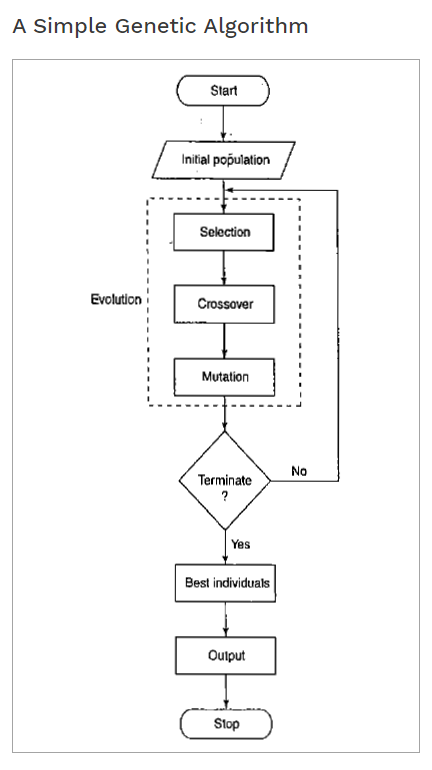

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/4, random_state = 0)
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.34*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        neigh_reg.fit(x_train.iloc[:,chromosome],y_train)
        predictions = neigh_reg.predict(x_test.iloc[:,chromosome])
        scores.append(r2_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
        # print(population_nextgen)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    # print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,x_train,x_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        # print(best_chromo)
    return best_chromo,best_score

In [ ]:
X_test.shape

In [ ]:
chromo,score=generations(size=460,n_feat=37,n_parents=100,mutation_rate=0.10,n_gen=38,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

In [ ]:
len(score)

In [ ]:
neigh_reg.fit(x_train.iloc[:,chromo[-1]],y_train)
y_pred63 = neigh_reg.predict(x_test.iloc[:,chromo[-1]])

In [ ]:
meansqureerror = mean_squared_error(y_test, y_pred63)
meansqureerror

In [ ]:
r2 = r2_score(y_test, y_pred63)
r2